In [1]:
import pandas as pd
import numpy as np
import gspread
from gspread_dataframe import get_as_dataframe
from oauth2client.service_account import ServiceAccountCredentials
#from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
#from google.colab import drive

# Монтируем Google Drive
#drive.mount('/content/drive')

# Загружаем файлы XLSX
file_paths = [
    'Contacts.xlsx'
    
]

# Словарь для хранения датафреймов
dfs = {}

# Чтение каждого файла в датафрейм pandas и добавление в словарь
for file_path in file_paths:
    # Извлекаем название файла из пути
    file_name = file_path.split('/')[-1].split('.')[0]
    # Читаем файл и сохраняем в словарь
    dfs[file_name] = pd.read_excel(file_path)

#Выводим на экран первые пять строк каждого датафрейма
#print(f"Датафрейм Calls:\n{dfs['Calls'].head()}")
print(f"Датафрейм Contacts:\n{dfs['Contacts'].head()}")
#print(f"Датафрейм Deals:\n{dfs['Deals'].head()}")
#print(f"Датафрейм Spend:\n{dfs['Spend'].head()}")

Датафрейм Contacts:
                    Id Contact Owner Name      Created Time     Modified Time
0  5805028000000645014       Rachel White  27.06.2023 11:28  22.12.2023 13:34
1  5805028000000872003      Charlie Davis  03.07.2023 11:31  21.05.2024 10:23
2  5805028000000889001          Bob Brown  02.07.2023 22:37  21.12.2023 13:17
3  5805028000000907006          Bob Brown  03.07.2023 05:44  29.12.2023 15:20
4  5805028000000939010         Nina Scott  04.07.2023 10:11  16.04.2024 16:14


In [3]:
print(f"Датафрейм Contacts:\n{dfs['Contacts'].describe()}")

Датафрейм Contacts:
                 Id
count  1.854800e+04
mean   5.805028e+18
std    1.566305e+07
min    5.805028e+18
25%    5.805028e+18
50%    5.805028e+18
75%    5.805028e+18
max    5.805028e+18


In [4]:
# Преобразование столбцов в формат datetime в датафрейме 'Contacts'
dfs['Contacts']['Created Time'] = pd.to_datetime(dfs['Contacts']['Created Time'], format='%d.%m.%Y %H:%M')
dfs['Contacts']['Modified Time'] = pd.to_datetime(dfs['Contacts']['Modified Time'], format='%d.%m.%Y %H:%M')

# Проверка изменений
print(dfs['Contacts'].dtypes)
print(dfs['Contacts'].head())
print(dfs['Contacts'].info())

Id                             int64
Contact Owner Name            object
Created Time          datetime64[ns]
Modified Time         datetime64[ns]
dtype: object
                    Id Contact Owner Name        Created Time  \
0  5805028000000645014       Rachel White 2023-06-27 11:28:00   
1  5805028000000872003      Charlie Davis 2023-07-03 11:31:00   
2  5805028000000889001          Bob Brown 2023-07-02 22:37:00   
3  5805028000000907006          Bob Brown 2023-07-03 05:44:00   
4  5805028000000939010         Nina Scott 2023-07-04 10:11:00   

        Modified Time  
0 2023-12-22 13:34:00  
1 2024-05-21 10:23:00  
2 2023-12-21 13:17:00  
3 2023-12-29 15:20:00  
4 2024-04-16 16:14:00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  18548 non-null  int64         
 1   Contact Owner Name  18

In [5]:
print(dfs['Contacts'].tail())
print(dfs['Contacts'].info())
print(dfs['Contacts'].isnull().sum())
print(dfs['Contacts'].nunique())
print(dfs['Contacts'][dfs['Contacts'].duplicated()])

                        Id Contact Owner Name        Created Time  \
18543  5805028000056889209      Ulysses Adams 2024-06-21 12:11:00   
18544  5805028000056889351           Eva Kent 2024-06-21 13:32:00   
18545  5805028000056892018           Eva Kent 2024-06-21 10:21:00   
18546  5805028000056892055       Yara Edwards 2024-06-21 10:22:00   
18547  5805028000056907001           Ben Hall 2024-06-21 10:56:00   

            Modified Time  
18543 2024-06-21 14:11:00  
18544 2024-06-21 15:32:00  
18545 2024-06-21 12:21:00  
18546 2024-06-21 12:23:00  
18547 2024-06-21 12:56:00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  18548 non-null  int64         
 1   Contact Owner Name  18548 non-null  object        
 2   Created Time        18548 non-null  datetime64[ns]
 3   Modified Time       1854

In [6]:
print(dfs['Contacts']['Contact Owner Name'].nunique())

28


In [7]:
print(dfs['Contacts']['Id'].nunique())

18548


In [8]:
print(dfs['Contacts']['Created Time'].nunique())

17921


In [9]:
print(dfs['Contacts']['Created Time'].unique())

<DatetimeArray>
['2023-06-27 11:28:00', '2023-07-03 11:31:00', '2023-07-02 22:37:00',
 '2023-07-03 05:44:00', '2023-07-04 10:11:00', '2023-07-04 12:57:00',
 '2023-07-03 20:17:00', '2023-07-04 15:40:00', '2023-07-04 22:03:00',
 '2023-07-03 20:39:00',
 ...
 '2024-06-21 14:45:00', '2024-06-21 11:46:00', '2024-06-21 11:43:00',
 '2024-06-21 13:21:00', '2024-06-21 10:36:00', '2024-06-21 12:11:00',
 '2024-06-21 13:32:00', '2024-06-21 10:21:00', '2024-06-21 10:22:00',
 '2024-06-21 10:56:00']
Length: 17921, dtype: datetime64[ns]


In [10]:
print(dfs['Contacts']['Created Time'].duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
18543    False
18544    False
18545    False
18546    False
18547    False
Name: Created Time, Length: 18548, dtype: bool


In [11]:
# Получение уникальных значений в столбце 'Contact Owner Name'
unique_values = dfs['Contacts']['Contact Owner Name'].unique()

# Печать списка уникальных значений
print("Уникальные значения в столбце 'Contact Owner Name':")
for value in unique_values:
    print(value)

Уникальные значения в столбце 'Contact Owner Name':
Rachel White
Charlie Davis
Bob Brown
Nina Scott
Alice Johnson
Ian Miller
Jane Smith
Julia Nelson
George King
Quincy Vincent
Diana Evans
Kevin Parker
Ulysses Adams
Victor Barnes
Yara Edwards
Paula Underwood
Mason Roberts
Ben Hall
Amy Green
Cara Iverson
Oliver Taylor
Eva Kent
False
Zachary Foster
Sam Young
Wendy Clark
Tina Zhang
Derek James


In [12]:
#удаляем строку, где имя = False
dfs['Contacts'] = dfs['Contacts'][dfs['Contacts']['Contact Owner Name'] != False]

# Печать датафрейма после удаления строк
print("\nДатафрейм после удаления строк, где 'Contact Owner Name' равно False:")
print(dfs['Contacts'])


Датафрейм после удаления строк, где 'Contact Owner Name' равно False:
                        Id Contact Owner Name        Created Time  \
0      5805028000000645014       Rachel White 2023-06-27 11:28:00   
1      5805028000000872003      Charlie Davis 2023-07-03 11:31:00   
2      5805028000000889001          Bob Brown 2023-07-02 22:37:00   
3      5805028000000907006          Bob Brown 2023-07-03 05:44:00   
4      5805028000000939010         Nina Scott 2023-07-04 10:11:00   
...                    ...                ...                 ...   
18543  5805028000056889209      Ulysses Adams 2024-06-21 12:11:00   
18544  5805028000056889351           Eva Kent 2024-06-21 13:32:00   
18545  5805028000056892018           Eva Kent 2024-06-21 10:21:00   
18546  5805028000056892055       Yara Edwards 2024-06-21 10:22:00   
18547  5805028000056907001           Ben Hall 2024-06-21 10:56:00   

            Modified Time  
0     2023-12-22 13:34:00  
1     2024-05-21 10:23:00  
2     2023-12-21

In [13]:
# Получение уникальных значений в столбце 'Contact Owner Name' - проверка на уникальные имена
unique_values = dfs['Contacts']['Contact Owner Name'].unique()

# Печать списка уникальных значений
print("Уникальные значения в столбце 'Contact Owner Name':")
for value in unique_values:
    print(value)

Уникальные значения в столбце 'Contact Owner Name':
Rachel White
Charlie Davis
Bob Brown
Nina Scott
Alice Johnson
Ian Miller
Jane Smith
Julia Nelson
George King
Quincy Vincent
Diana Evans
Kevin Parker
Ulysses Adams
Victor Barnes
Yara Edwards
Paula Underwood
Mason Roberts
Ben Hall
Amy Green
Cara Iverson
Oliver Taylor
Eva Kent
Zachary Foster
Sam Young
Wendy Clark
Tina Zhang
Derek James


In [14]:
#количество уникальных данных
print(dfs['Contacts']['Contact Owner Name'].nunique())

27


In [15]:
# Печать количества пропущенных значений для каждого столбца датафрейма Contacts
print(dfs['Contacts'].isnull().sum())

Id                    0
Contact Owner Name    0
Created Time          0
Modified Time         0
dtype: int64


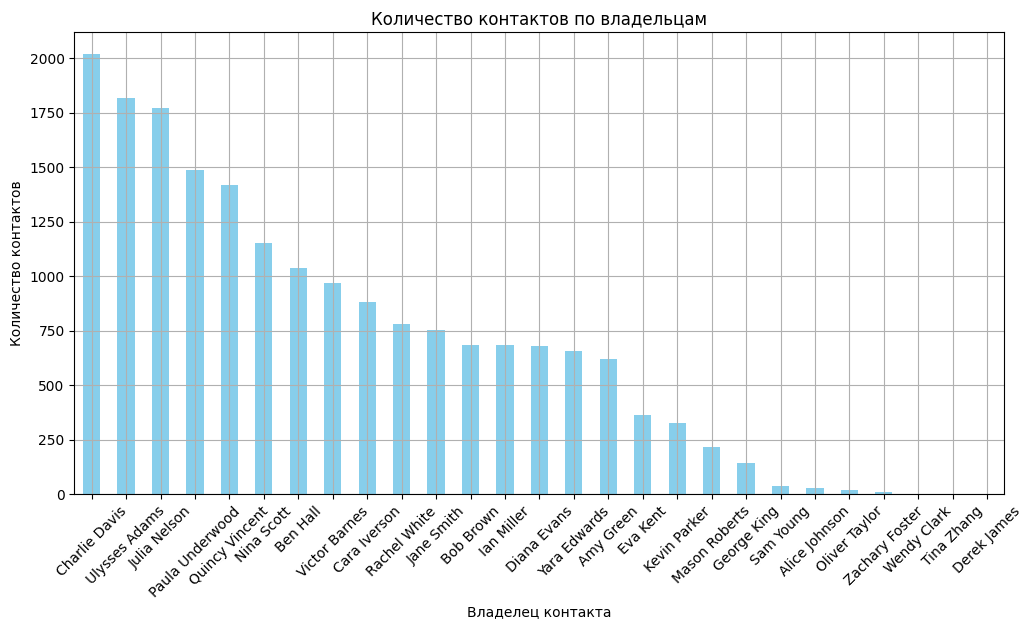

In [16]:
import matplotlib.pyplot as plt

# График распределения количества контактов по владельцам
contact_owner_counts = dfs['Contacts']['Contact Owner Name'].value_counts()
plt.figure(figsize=(12, 6))
contact_owner_counts.plot(kind='bar', color='skyblue')
plt.title('Количество контактов по владельцам')
plt.xlabel('Владелец контакта')
plt.ylabel('Количество контактов')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

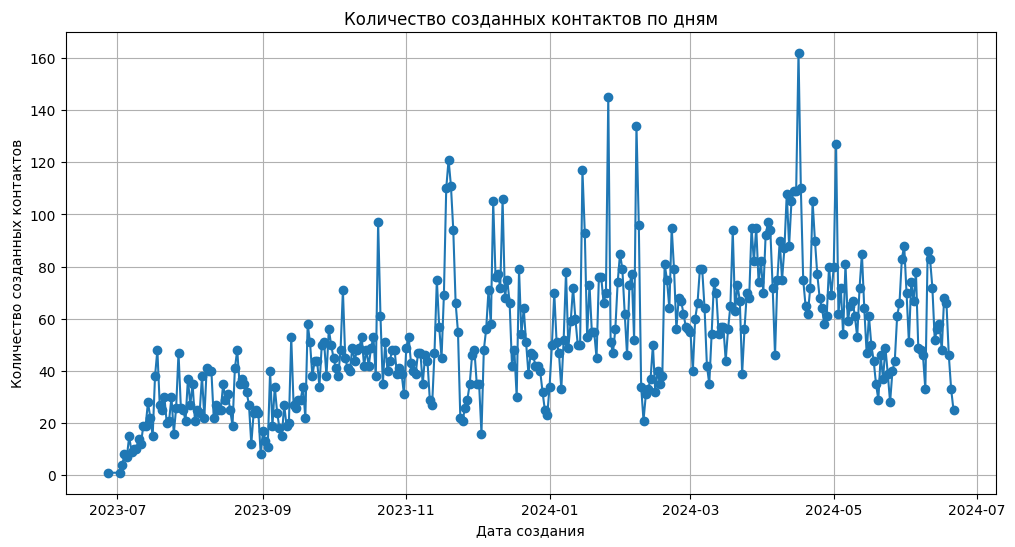

In [17]:
# Извлечение даты из столбца 'Created Time' и создание нового столбца 'Created Date' с использованием .loc
dfs['Contacts'].loc[:, 'Created Date'] = dfs['Contacts']['Created Time'].dt.date

# Группировка по дате и подсчет количества созданных контактов
contacts_per_day_created = dfs['Contacts'].groupby('Created Date').size()

# Построение графика
plt.figure(figsize=(12, 6))
contacts_per_day_created.plot(kind='line', marker='o')
plt.title('Количество созданных контактов по дням')
plt.xlabel('Дата создания')
plt.ylabel('Количество созданных контактов')
plt.grid(True)
plt.show()

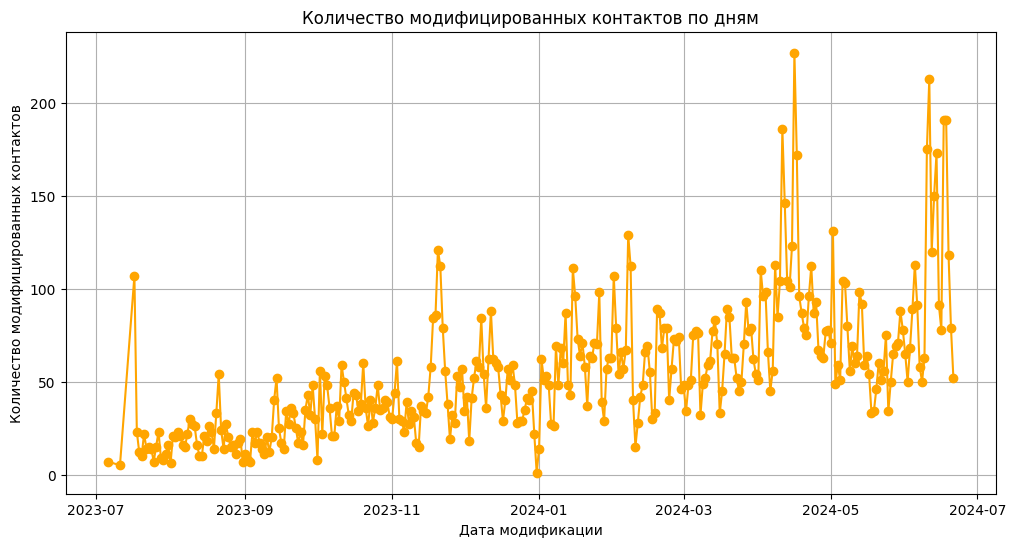

In [18]:
# Извлечение даты из столбца 'Modified Time' и создание нового столбца 'Modified Date' с использованием .loc
dfs['Contacts'].loc[:, 'Modified Date'] = dfs['Contacts']['Modified Time'].dt.date

# Группировка по дате и подсчет количества модифицированных контактов
contacts_per_day_modified = dfs['Contacts'].groupby('Modified Date').size()

# Построение графика
plt.figure(figsize=(12, 6))
contacts_per_day_modified.plot(kind='line', marker='o', color='orange')
plt.title('Количество модифицированных контактов по дням')
plt.xlabel('Дата модификации')
plt.ylabel('Количество модифицированных контактов')
plt.grid(True)
plt.show()

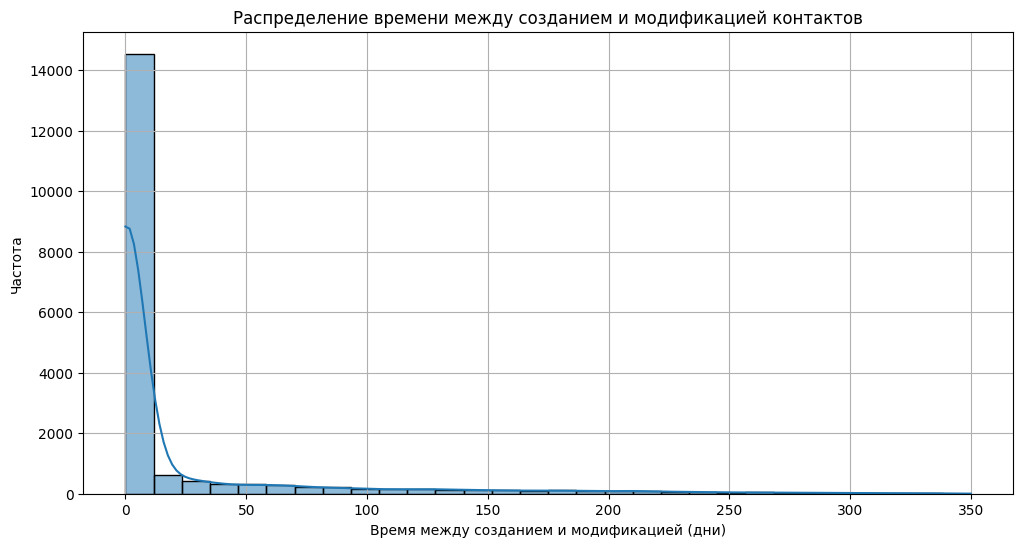

In [24]:
#График времени между созданием и модификацией контактов. Цель: Изучить, как долго контакты оставались без изменений до их модификации.
# Создайте копию DataFrame
contacts_df = dfs['Contacts'].copy()

# Добавьте новый столбец
contacts_df['Time Between Creation and Modification'] = (
    (contacts_df['Modified Time'] - contacts_df['Created Time']).dt.days
)

# Расчет разницы времени между созданием и модификацией
#dfs['Contacts']['Time Between Creation and Modification'] = (dfs['Contacts']['Modified Time'] - dfs['Contacts']['Created Time']).dt.days

# График времени между созданием и модификацией
plt.figure(figsize=(12, 6))
sns.histplot(dfs['Contacts']['Time Between Creation and Modification'], bins=30, kde=True)
plt.title('Распределение времени между созданием и модификацией контактов')
plt.xlabel('Время между созданием и модификацией (дни)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

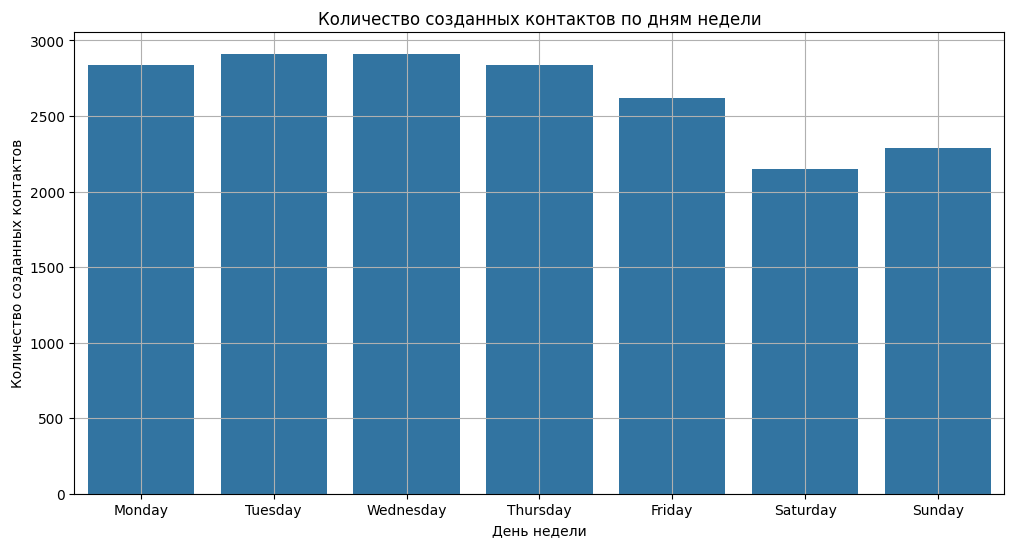

In [19]:
#График распределения количества контактов по дням недели
#Цель: Изучить, в какие дни недели чаще всего создаются контакты.

# Извлечение дня недели из Created Date
dfs['Contacts']['Created Day Of Week'] = dfs['Contacts']['Created Time'].dt.day_name()

# График количества созданных контактов по дням недели
plt.figure(figsize=(12, 6))
sns.countplot(x='Created Day Of Week', data=dfs['Contacts'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Количество созданных контактов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество созданных контактов')
plt.grid(True)
plt.show()

In [20]:
print(f"Датафрейм Contacts:\n{dfs['Contacts'].describe()}")

Датафрейм Contacts:
                 Id                   Created Time  \
count  1.854700e+04                          18547   
mean   5.805028e+18  2024-01-24 14:09:50.977516544   
min    5.805028e+18            2023-06-27 11:28:00   
25%    5.805028e+18            2023-11-15 16:55:30   
50%    5.805028e+18            2024-02-01 18:32:00   
75%    5.805028e+18            2024-04-12 16:40:30   
max    5.805028e+18            2024-06-21 15:30:00   
std    1.566273e+07                            NaN   

                       Modified Time  
count                          18547  
mean   2024-02-15 07:51:05.363670784  
min              2023-07-06 10:54:00  
25%              2023-12-09 13:06:00  
50%              2024-02-28 22:44:00  
75%              2024-04-26 22:08:00  
max              2024-06-21 15:32:00  
std                              NaN  


In [21]:
print(f"Датафрейм Contacts:\n{dfs['Contacts'].head()}")

Датафрейм Contacts:
                    Id Contact Owner Name        Created Time  \
0  5805028000000645014       Rachel White 2023-06-27 11:28:00   
1  5805028000000872003      Charlie Davis 2023-07-03 11:31:00   
2  5805028000000889001          Bob Brown 2023-07-02 22:37:00   
3  5805028000000907006          Bob Brown 2023-07-03 05:44:00   
4  5805028000000939010         Nina Scott 2023-07-04 10:11:00   

        Modified Time Created Date Modified Date Created Day Of Week  
0 2023-12-22 13:34:00   2023-06-27    2023-12-22             Tuesday  
1 2024-05-21 10:23:00   2023-07-03    2024-05-21              Monday  
2 2023-12-21 13:17:00   2023-07-02    2023-12-21              Sunday  
3 2023-12-29 15:20:00   2023-07-03    2023-12-29              Monday  
4 2024-04-16 16:14:00   2023-07-04    2024-04-16             Tuesday  


In [22]:
#Анализ количества контактов. Общее количество контактов: 

total_contacts = len(dfs['Contacts'])
print(f"Общее количество контактов: {total_contacts}")

#Количество контактов по владельцам: Определяем, сколько контактов у каждого владельца- менеджера.
contacts_per_owner = dfs['Contacts']['Contact Owner Name'].value_counts()
print(contacts_per_owner)

Общее количество контактов: 18547
Contact Owner Name
Charlie Davis      2018
Ulysses Adams      1816
Julia Nelson       1769
Paula Underwood    1487
Quincy Vincent     1416
Nina Scott         1150
Ben Hall           1038
Victor Barnes       967
Cara Iverson        880
Rachel White        782
Jane Smith          754
Bob Brown           685
Ian Miller          684
Diana Evans         678
Yara Edwards        655
Amy Green           621
Eva Kent            365
Kevin Parker        325
Mason Roberts       217
George King         144
Sam Young            37
Alice Johnson        27
Oliver Taylor        19
Zachary Foster        8
Wendy Clark           2
Tina Zhang            2
Derek James           1
Name: count, dtype: int64


In [23]:
#2. Анализ по времени создания и модификации
#Среднее время создания контакта: 

dfs['Contacts']['Created Time'] = pd.to_datetime(dfs['Contacts']['Created Time'])
average_creation_time = dfs['Contacts']['Created Time'].mean()
print(f"Среднее время создания контакта: {average_creation_time}")

#Количество контактов по месяцам: 
contacts_per_month = dfs['Contacts']['Created Time'].dt.to_period('M').value_counts()
print(contacts_per_month)

#Среднее время до последней модификации:  среднее время, прошедшее с последней модификации контактов.

dfs['Contacts']['Modified Time'] = pd.to_datetime(dfs['Contacts']['Modified Time'])
time_since_last_modification = dfs['Contacts']['Modified Time'] - dfs['Contacts']['Created Time']
average_time_since_modification = time_since_last_modification.mean()
print(f"Среднее время с последней модификации: {average_time_since_modification}")


Среднее время создания контакта: 2024-01-24 14:09:50.977516544
Created Time
2024-04    2535
2024-03    2009
2024-01    1992
2024-05    1849
2024-02    1730
2023-12    1668
2023-11    1576
2023-10    1458
2024-06    1209
2023-09     991
2023-08     899
2023-07     630
2023-06       1
Freq: M, Name: count, dtype: int64
Среднее время с последней модификации: 21 days 17:41:14.386154095


In [24]:
#3. Анализ частоты изменений. Частота изменений для каждого контакта: как часто каждый контакт был модифицирован.
modification_frequency = dfs['Contacts'].groupby('Id').size()
print(modification_frequency.describe())


count    18547.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64


In [25]:
#4. Анализ по владельцам контактов
#Среднее количество контактов на владельца-менеджера: сколько в среднем контактов приходится на каждого владельца - менеджера.

avg_contacts_per_owner = dfs['Contacts'].groupby('Contact Owner Name').size().mean()
print(f"Среднее количество контактов на владельца: {avg_contacts_per_owner}")


#Владельцы с наибольшим числом контактов: владельцы - менеджеры, у которых больше всего контактов.

top_owners = dfs['Contacts']['Contact Owner Name'].value_counts().head(10)
print(top_owners)


Среднее количество контактов на владельца: 686.925925925926
Contact Owner Name
Charlie Davis      2018
Ulysses Adams      1816
Julia Nelson       1769
Paula Underwood    1487
Quincy Vincent     1416
Nina Scott         1150
Ben Hall           1038
Victor Barnes       967
Cara Iverson        880
Rachel White        782
Name: count, dtype: int64


In [26]:
#5. Анализ пропусков
#Количество пропусков в столбцах:  количество пропусков в каждом столбце.

missing_values = dfs['Contacts'].isna().sum()
print(missing_values)


Id                     0
Contact Owner Name     0
Created Time           0
Modified Time          0
Created Date           0
Modified Date          0
Created Day Of Week    0
dtype: int64


In [27]:
#6. Анализ временных изменений
#Время от создания до последней модификации: как быстро контакты модифицируются после создания.

time_to_modification = dfs['Contacts']['Modified Time'] - dfs['Contacts']['Created Time']
print(time_to_modification.describe())


count                         18547
mean     21 days 17:41:14.386154095
std      53 days 11:38:51.931199920
min                 0 days 00:00:00
25%                 0 days 02:00:00
50%                 0 days 02:04:00
75%                 6 days 07:43:00
max               350 days 13:31:00
dtype: object


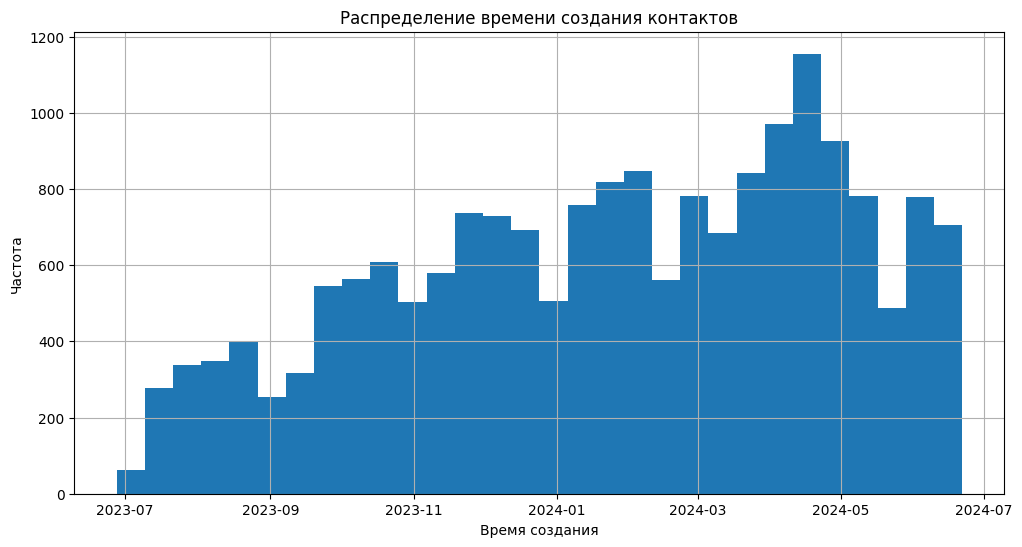

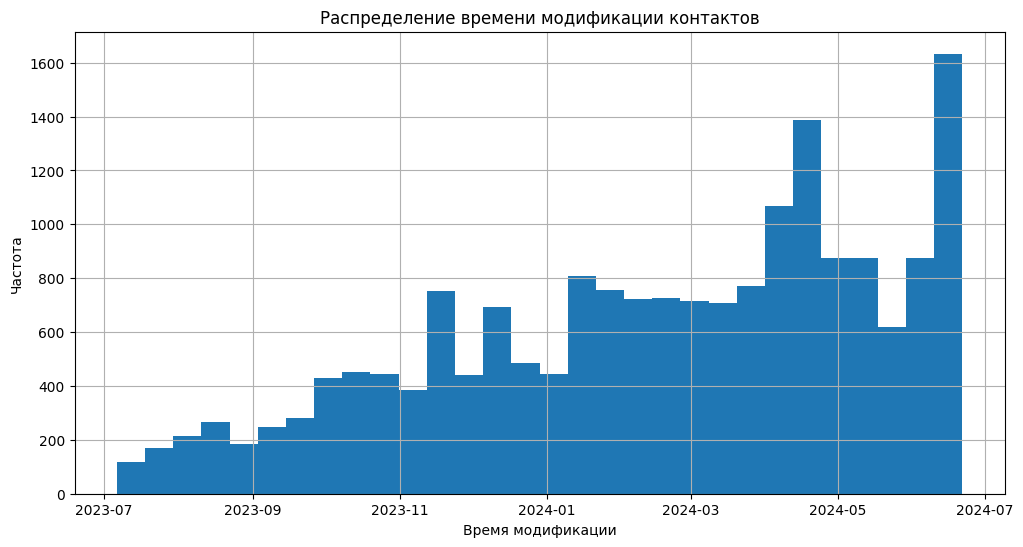

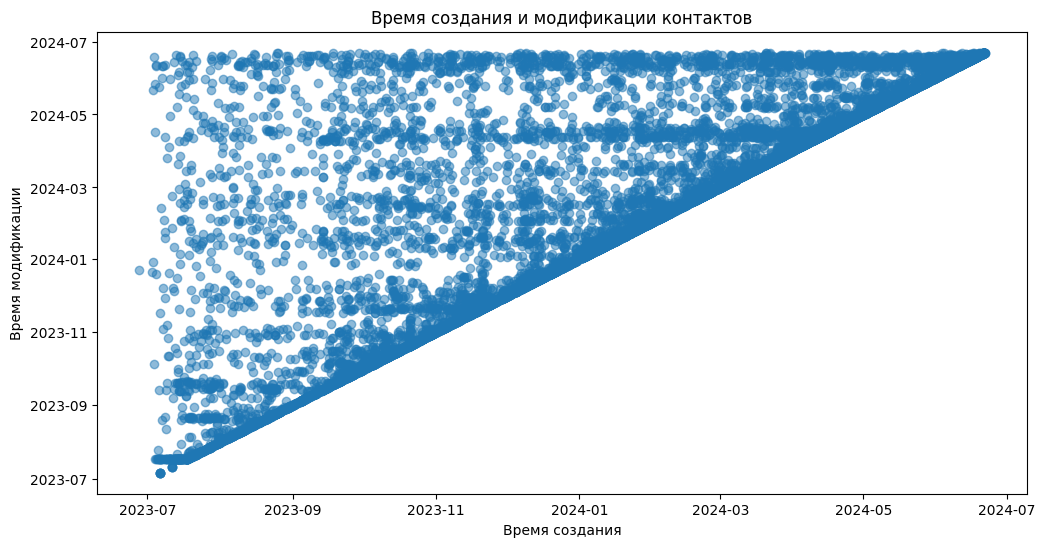

In [28]:
#7. Визуализация данных
#Гистограммы по времени создания и модификации:  распределение времени создания и модификации.

import matplotlib.pyplot as plt

# Гистограмма времени создания
plt.figure(figsize=(12, 6))
dfs['Contacts']['Created Time'].hist(bins=30)
plt.title('Распределение времени создания контактов')
plt.xlabel('Время создания')
plt.ylabel('Частота')
plt.show()

# Гистограмма времени модификации
plt.figure(figsize=(12, 6))
dfs['Contacts']['Modified Time'].hist(bins=30)
plt.title('Распределение времени модификации контактов')
plt.xlabel('Время модификации')
plt.ylabel('Частота')
plt.show()

#Диаграмма рассеяния времени создания и модификации:  зависимость времени создания и последующей модификации.


plt.figure(figsize=(12, 6))
plt.scatter(dfs['Contacts']['Created Time'], dfs['Contacts']['Modified Time'], alpha=0.5)
plt.title('Время создания и модификации контактов')
plt.xlabel('Время создания')
plt.ylabel('Время модификации')
plt.show()

In [29]:
dfs['Contacts'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18547 entries, 0 to 18547
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   18547 non-null  int64         
 1   Contact Owner Name   18547 non-null  object        
 2   Created Time         18547 non-null  datetime64[ns]
 3   Modified Time        18547 non-null  datetime64[ns]
 4   Created Date         18547 non-null  object        
 5   Modified Date        18547 non-null  object        
 6   Created Day Of Week  18547 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.1+ MB


In [31]:
dfs['Contacts'].drop(columns=['Created Date', 'Modified Date', 'Created Day Of Week'], inplace=True)
print(dfs['Contacts'].info())

<class 'pandas.core.frame.DataFrame'>
Index: 18547 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  18547 non-null  int64         
 1   Contact Owner Name  18547 non-null  object        
 2   Created Time        18547 non-null  datetime64[ns]
 3   Modified Time       18547 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 724.5+ KB
None


In [32]:
contacts_df = pd.DataFrame(dfs['Contacts'].copy())

In [33]:
contacts_df

,Id,Contact Owner Name,Created Time,Modified Time
0,5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00
1,5805028000000872003,Charlie Davis,2023-07-03 11:31:00,2024-05-21 10:23:00
2,5805028000000889001,Bob Brown,2023-07-02 22:37:00,2023-12-21 13:17:00
3,5805028000000907006,Bob Brown,2023-07-03 05:44:00,2023-12-29 15:20:00
4,5805028000000939010,Nina Scott,2023-07-04 10:11:00,2024-04-16 16:14:00
...,...,...,...,...
18543,5805028000056889209,Ulysses Adams,2024-06-21 12:11:00,2024-06-21 14:11:00
18544,5805028000056889351,Eva Kent,2024-06-21 13:32:00,2024-06-21 15:32:00
18545,5805028000056892018,Eva Kent,2024-06-21 10:21:00,2024-06-21 12:21:00
18546,5805028000056892055,Yara Edwards,2024-06-21 10:22:00,2024-06-21 12:23:00
